In [2]:
with open('in.txt', 'r') as infile:
    dataraw = infile.read()
data = [(int(item), dataraw.count(item)) for item in sorted(set(dataraw.splitlines()))]
print(data)
dataraw2 = [int(item) for item in dataraw.splitlines()]
print(dataraw2)

FileNotFoundError: [Errno 2] No such file or directory: 'in.txt'

In [ ]:
average = sum(k[0] * k[1] for k in data) / sum(k[1] for k in data)
variance = sum((item[0] - average) ** 2 * item[1] for item in data) / sum(item[1] for item in data)
stddev = variance ** 0.5

mode = max(data, key=lambda x: x[1])

median = 0
total = 0
for value, freq in sorted(data):
    total += freq
    if total >= sum(k[1] for k in data) / 2:
        median = value
        break

range_val = max(k[0] for k in data) - min(k[0] for k in data)

variation_coefficient = stddev / average

average +- z_(gamma/2)*stddev/sqrt(n)
z_(gamma/2)*stddev/sqrt(n) < delta

n >= (z_(gamma/2)*sigma/delta)**2

In [ ]:
from math import ceil, floor
num_samples = 36
gamma = 0.95
z = 1.96  # table value for normal distribution (stddev is known)
delta = 3
#seed = 104


n = ceil((z * stddev / delta) ** 2)
print(n)

trust_interval = (average - z * stddev / n ** 0.5, average + z * stddev / n ** 0.5)
print(trust_interval)

62
(32.37646842478273, 38.36954520751533)


In [ ]:
import random

samples = [random.choices(dataraw2, k=n) for _ in range(num_samples)]
print(samples)
sample_means = [sum(s) / n for s in samples]
print(sample_means)


[[45, 26, 41, 48, 18, 29, 25, 37, 26, 32, 32, 19, 26, 44, 25, 48, 51, 27, 40, 42, 32, 35, 27, 23, 29, 23, 28, 27, 16, 44, 43, 47, 36, 41, 69, 35, 32, 34, 25, 49, 36, 35, 30, 39, 31, 26, 50, 39, 15, 43, 70, 39, 34, 26, 31, 25, 64, 20, 47, 45, 27, 21], [60, 33, 21, 37, 39, 31, 30, 59, 36, 32, 27, 41, 39, 19, 36, 49, 19, 25, 58, 49, 18, 26, 24, 31, 39, 47, 29, 35, 33, 38, 36, 20, 16, 19, 26, 25, 34, 67, 29, 45, 16, 46, 29, 28, 33, 38, 32, 18, 22, 22, 19, 21, 21, 39, 29, 67, 27, 18, 64, 20, 37, 19], [18, 56, 29, 44, 31, 44, 16, 36, 29, 18, 45, 29, 41, 38, 49, 26, 31, 27, 48, 19, 42, 40, 50, 29, 29, 19, 35, 47, 21, 40, 49, 31, 31, 31, 35, 40, 30, 47, 47, 26, 48, 49, 41, 25, 43, 30, 41, 42, 51, 25, 39, 29, 17, 33, 46, 29, 47, 31, 33, 45, 60, 51], [19, 27, 22, 23, 45, 48, 22, 22, 46, 31, 33, 24, 43, 18, 38, 48, 34, 29, 49, 28, 40, 27, 22, 24, 46, 26, 28, 30, 62, 44, 44, 49, 39, 32, 45, 43, 22, 60, 28, 33, 36, 26, 67, 63, 21, 48, 39, 66, 48, 33, 29, 17, 48, 35, 26, 49, 25, 48, 29, 18, 31, 39],

In [ ]:
a = floor(min(sample_means))
b = ceil(max(sample_means))
print('min boundary: ', a)
print('max boundary: ', b)

intervals = list(range(a, b))
freq = [0] * (b - a)
for mean in sample_means:
    idx = int(mean) - a
    if idx == len(freq):  
        idx -= 1
    freq[idx] += 1

print(freq)
print(sum(freq))

rel_freq = [f / len(sample_means) for f in freq]
print(rel_freq)

intervals = [(intervals[i], intervals[i] + 1, rel_freq[i]) for i in range(len(intervals))]
print(intervals)

min boundary:  32
max boundary:  39
[3, 5, 9, 7, 10, 1, 1]
36
[0.08333333333333333, 0.1388888888888889, 0.25, 0.19444444444444445, 0.2777777777777778, 0.027777777777777776, 0.027777777777777776]
[(32, 33, 0.08333333333333333), (33, 34, 0.1388888888888889), (34, 35, 0.25), (35, 36, 0.19444444444444445), (36, 37, 0.2777777777777778), (37, 38, 0.027777777777777776), (38, 39, 0.027777777777777776)]


In [ ]:
mean_sample_means = sum(sample_means) / len(sample_means)
variance_sample_means = sum((x - mean_sample_means) ** 2 for x in sample_means) / len(sample_means)
stddev_sample_means = variance_sample_means ** 0.5
print(f"expected value (sample means) = {mean_sample_means:.3f}")
print(f"variance (sample means) = {variance_sample_means:.3f}")
print(f"std deviation (sample means) = {stddev_sample_means:.3f}")

expected value (sample means) = 35.155
variance (sample means) = 1.587
std deviation (sample means) = 1.260


[32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5]


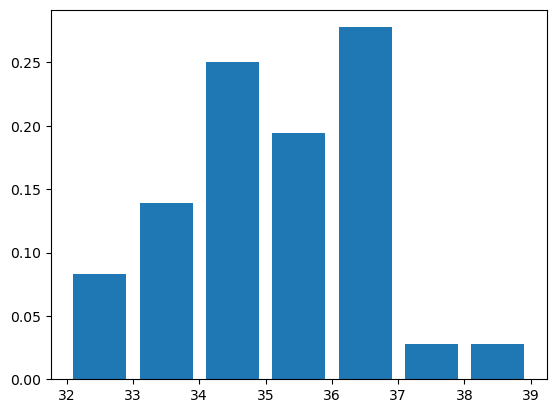

In [ ]:
from matplotlib import pyplot as plt
midpoints = [(a + b) / 2 for a, b, f in intervals]
print(midpoints)
plt.bar(midpoints, rel_freq)
plt.show()


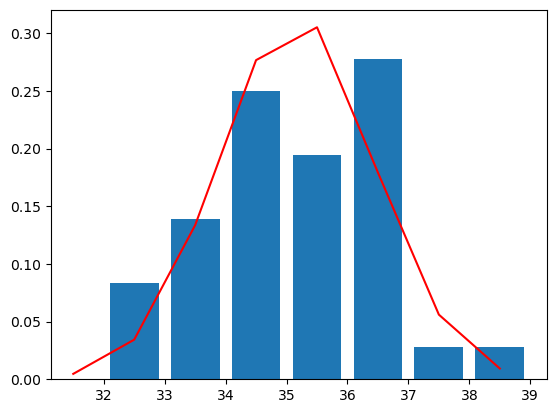

In [ ]:
import math

mean_sample_means = sum(sample_means) / len(sample_means)
std_sample_means = (sum((x - mean_sample_means) ** 2 for x in sample_means) / len(sample_means)) ** 0.5

bin_width = midpoints[1] - midpoints[0]
x_vals = [min(midpoints) - 1 + i for i in range(int((max(midpoints) - min(midpoints) + 2)))]

gauss_vals = [
    (1 / (std_sample_means * math.sqrt(2 * math.pi))) * math.exp(-((x - mean_sample_means) ** 2) / (2 * std_sample_means ** 2)) * bin_width
    for x in x_vals
]

plt.bar(midpoints, rel_freq)
plt.plot(x_vals, gauss_vals, 'r')
plt.show()

In [ ]:
from scipy.stats import t

toanalyse = samples[0]
mean = sum(toanalyse)/len(toanalyse)
print(f'Точечная оценка: {mean}')
alpha = 1 - gamma
dfree = len(toanalyse) - 1
sample_std = (sum((x - mean) ** 2 for x in toanalyse) / dfree) ** 0.5
t_crit = t.ppf(1 - alpha / 2, dfree)
print('t:', t_crit)
margin = t_crit * sample_std / (len(toanalyse) ** 0.5)
trust_interval_sample = (float(mean - margin), float(mean + margin))
print('Доверительный интервал:', trust_interval_sample)
accuracy = z * stddev / (n ** 0.5)
print('Точность выборочного среднего', accuracy)

Точечная оценка: 34.983870967741936
t: 1.9996235849949393
Доверительный интервал: (31.984879066622806, 37.98286286886107)
Точность выборочного среднего 2.9965383913663017


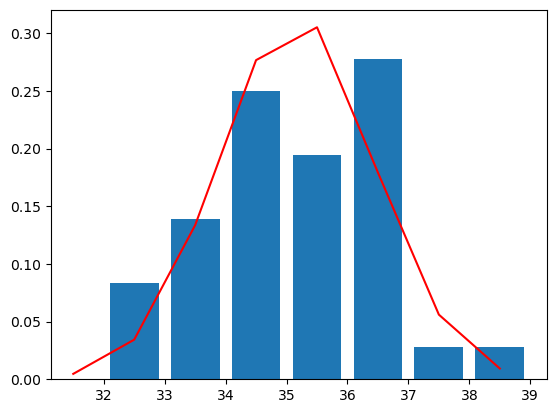

In [ ]:
plt.plot(x_vals, [y for y in gauss_vals], 'r')
plt.bar(midpoints, rel_freq)
plt.show()